# 任务四 会员用户细分模型和营销方案制定
## 对会员用户进行精细划分并分析不同群体带来的价值差异

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [4]:
#导入数据
data = pd.read_csv('mb_fx.csv')

In [6]:
data['最后一次消费时间'] = pd.to_datetime(data['最后一次消费时间'])#转化为日期格式数据

In [15]:
data['最后一次消费时间'].max()

Timestamp('2018-01-03 21:27:28.686000')

In [67]:
#RFM = pd.DataFrame()
#RFM['卡号'] = data['卡号']
RFM['R'] = (pd.to_datetime('2018-1-04') - data['最后一次消费时间']).dt.days
RFM['F'] = data['消费频率']
RFM['M'] = data['消费金额']

In [65]:
RFM = pd.DataFrame()

In [68]:
RFM.head()

,R,F,M
0,910,2,2659.0
1,167,1,310.0
2,1066,1,4375.0
3,45,2,1078.0
4,329,2,1775.0


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(RFM)
RFM_normal = sc.transform(RFM)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
for i in range(2,5):
    kmeans = KMeans(n_clusters=i).fit(RFM)
    score = calinski_harabasz_score(RFM,kmeans.labels_)
    print(score)

32196.01504052277
36549.602023539046
43191.18047600034


(<a list of 8 Line2D ticklines objects>,
 <a list of 4 Text major ticklabel objects>)

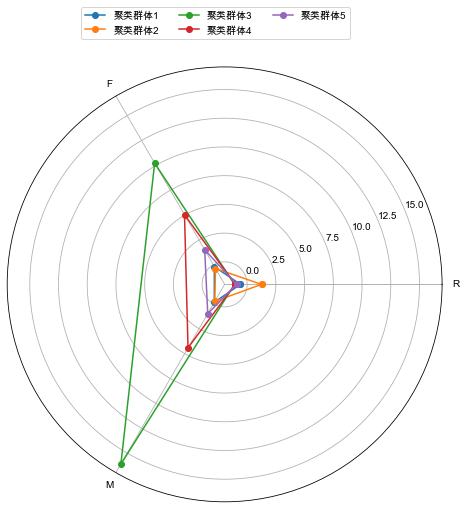

In [101]:
angles = np.linspace(0,2*np.pi,3,endpoint=False) # 将圆根据标签的个数等比分
angles = np.concatenate((angles,[angles[0]])) # 闭合
centers = model.cluster_centers_  # 获取聚类中心数据
plt_data = np.concatenate((centers,centers[:,[0]]),axis=1)
label = ['R','F','M'] 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar = True)
for i in range(len(plt_data)):
    ax.plot(angles, plt_data[i], 'o-', label='聚类群体'+str(i+1))
ax.set_thetagrids(angles*180/np.pi, label)
plt.legend(bbox_to_anchor=(0.8, 1.15),ncol=3) 
plt.show()